# MID - PROJECT. Regression

I am going to perform an end-to-end analysis of the data set "regression_data" in order to creat a Regression Model that can help us predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

The first step it to import the data and take a quick look into it in order to see and understand the columns and their values.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [192]:
data = pd.read_excel('regression_data.xls')

In [193]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


We can see that in our dataset we have 21597 rows and 21 columns. Let's see now what are the names of the columns:

In [194]:
data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

We are also gonig to do a 'dtype' to see the types of each column.

In [195]:
data.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

I observe that I only have numerical columns.

In [196]:
data_numerical_columns= data.select_dtypes(include='number')

In [197]:
data_numerical_columns # Numerical columns

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [198]:
# I passed id as the index
data = data.set_index('id')

Let's take a look into some basic metrics that will help understand a little bit our data

In [199]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


Now that I have had a first look into the data and it content I will start the data cleaning.

## Data Cleaning

It is time to check the NaN values

In [200]:
data.isna().sum() 

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

I see we don't have any NaN values!

#### Checking outliers

We start checking for outliers on the target variable:

<AxesSubplot:xlabel='price', ylabel='Density'>

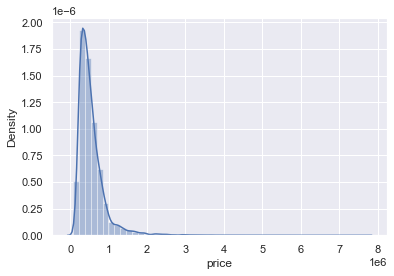

In [201]:
sns.distplot(data['price'])

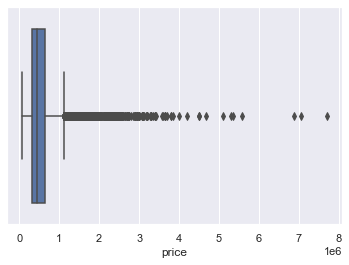

In [202]:
sns.boxplot(data['price'])
plt.show()

In [203]:
round(data['price'].describe(),2)

count      21597.00
mean      540296.57
std       367368.14
min        78000.00
25%       322000.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

I observe we have some outliers in our target variable. This makes sense, as it can be that a few houses are very expensive, much more than the average. We see that the mean price is 540.296,57€ and the maximum value is 7.700.000€, which is very far from the average. For the moment I am not going to do anything with thise outliers because I consider they are part of reality and I want my model to take them into account. 

For the rest of the features I will not touch them yet, I want first to try scaling

## EDA

I am going to start the Exploratory Data Analysis (EDA), this will help us understand the statistical aspects of the data and see it's insights.

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Is a good idea to plot some graph to understand more the data and to see if there are any relationship between variables

Let's see first the distribution of each variable

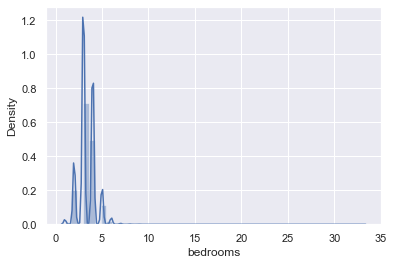

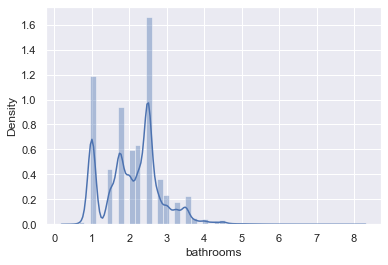

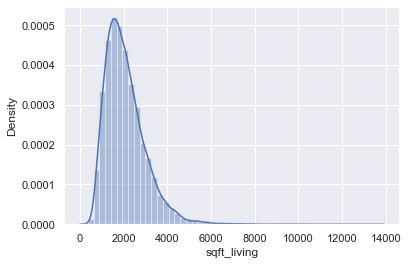

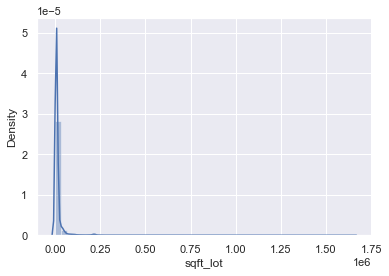

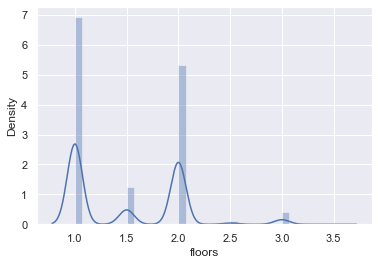

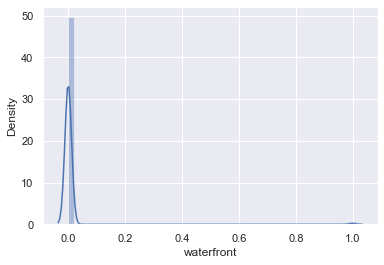

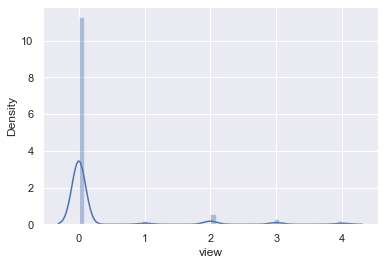

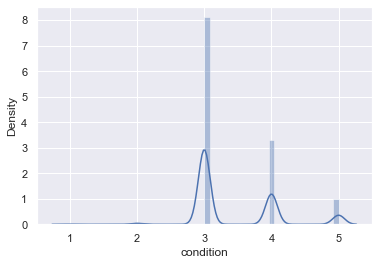

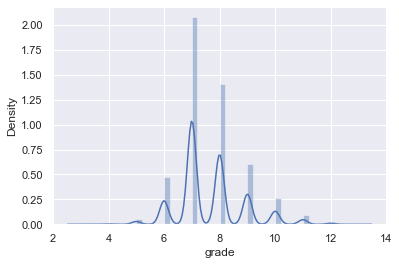

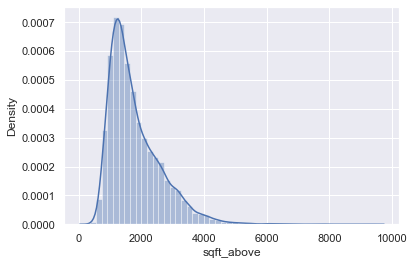

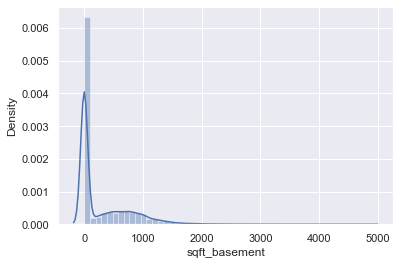

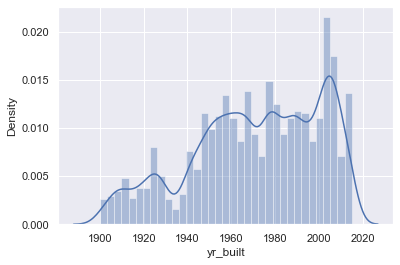

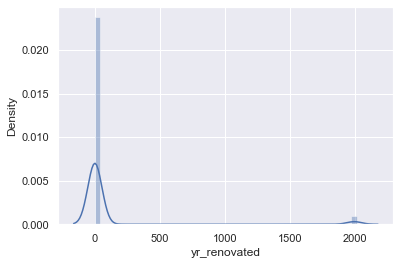

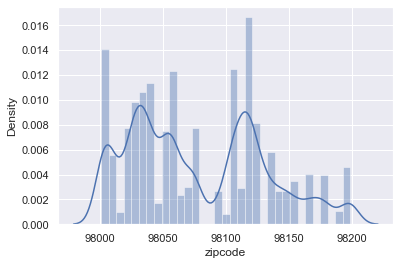

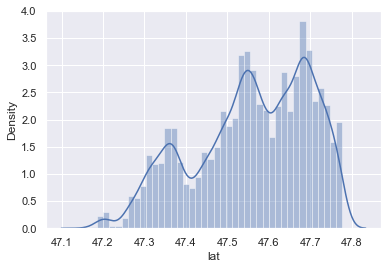

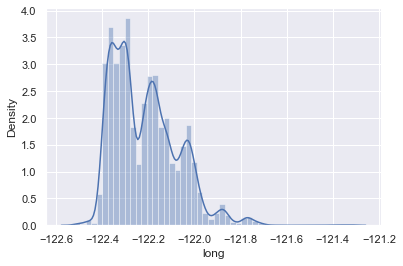

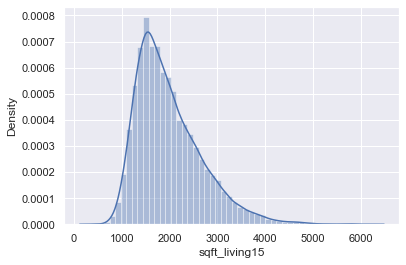

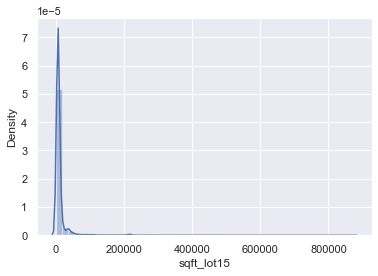

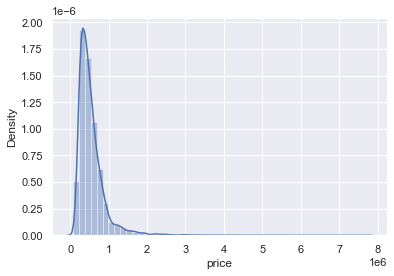

In [206]:
for column in data.select_dtypes(np.number).columns: 
    sns.distplot(data[column])
    plt.show()

With this graph, I detect which are the discrete numerical variables and which are the continuous ones. Also for the continuous ones I can see some of them follow quite a normal distribution, like Sqft_above or Sqft_living15

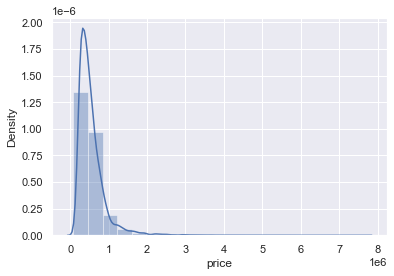

In [207]:
sns.distplot(data['price'], bins=20)
plt.show()

Our target variable distribution is skew to the right

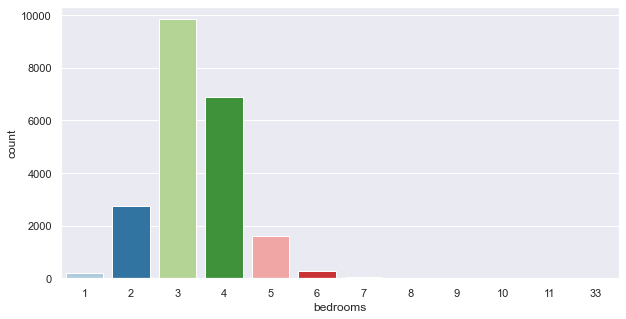

In [208]:
plt.figure(figsize=(10,5))
sns.countplot(x='bedrooms', data=data, palette = "Paired")
plt.show()

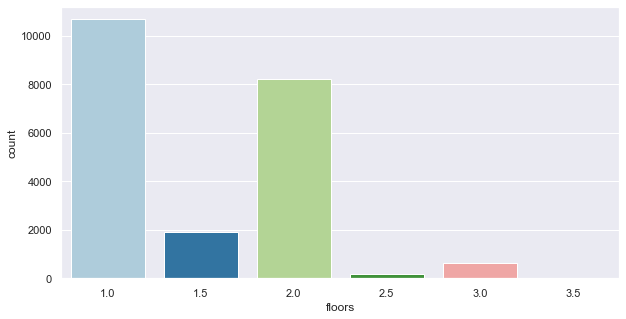

In [209]:
plt.figure(figsize=(10,5))
sns.countplot(x='floors', data=data, palette = "Paired")
plt.show()

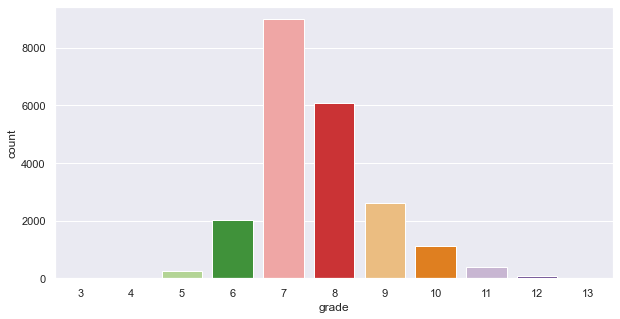

In [210]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=data, palette = "Paired")
plt.show()

In [211]:
data = data.reset_index()

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

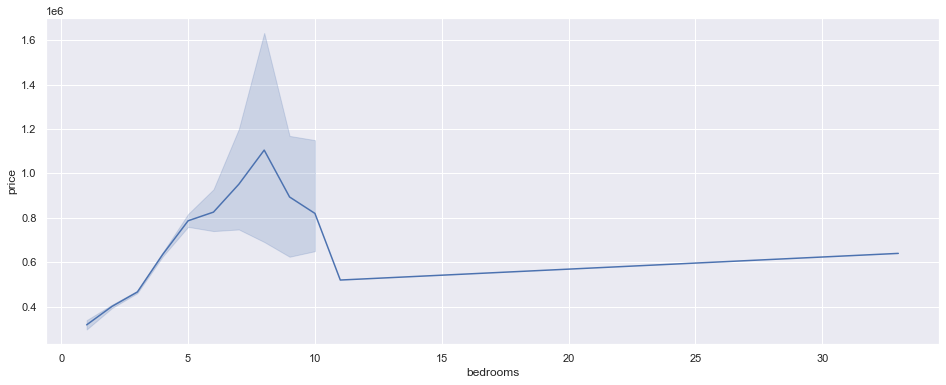

In [212]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="bedrooms", y="price")

The price of the hoses increases with the number of bedrooms until it reaches 6-7 bedrooms, and then it decreases with the increase of bedrooms. 

<AxesSubplot:xlabel='yr_built', ylabel='price'>

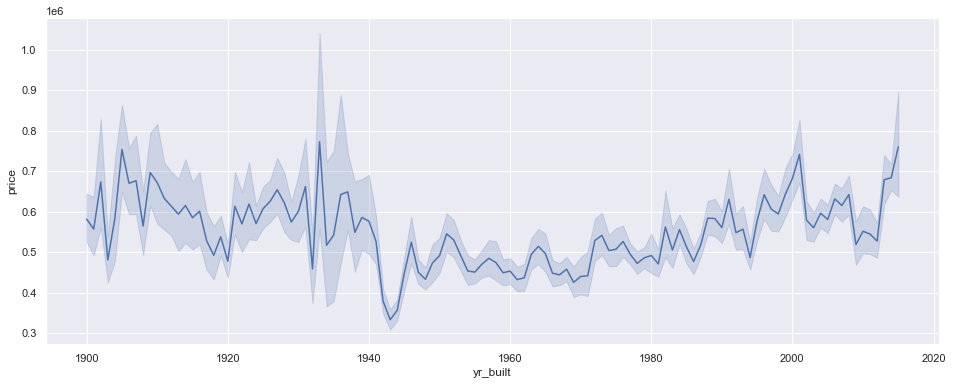

In [213]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="yr_built", y="price")

We can see in the graph that the houses built between 1940 and 1980 are cheaper. 

<AxesSubplot:xlabel='zipcode', ylabel='price'>

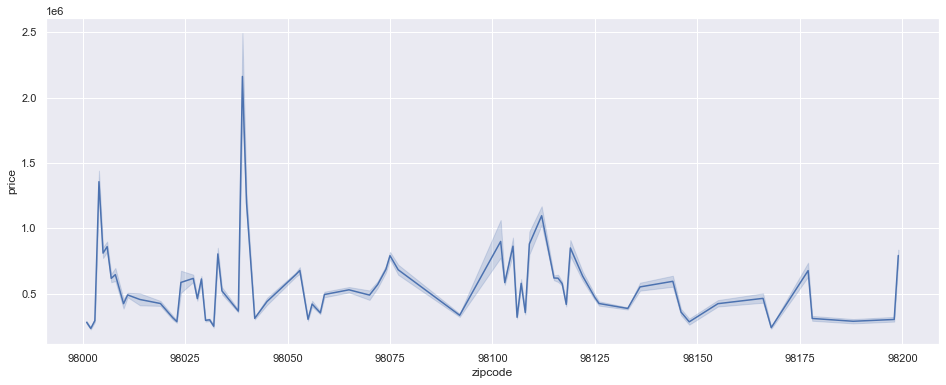

In [214]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="zipcode", y="price")

We can observe a clear positive relationship between grade and price, the higher the grade, the higher the price

In [215]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


I am going to use cluster to make sense of the information that the variables zipcode, lat, long gives us. 

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv


In [217]:
# Variable with the Longitude and Latitude
X_lat_log=data.loc[:,['zipcode','lat','long']]
X_lat_log.head(10)

,zipcode,lat,long
0,98178,47.5112,-122.257
1,98125,47.7210,-122.319
2,98028,47.7379,-122.233
3,98136,47.5208,-122.393
4,98074,47.6168,-122.045
5,98053,47.6561,-122.005
6,98003,47.3097,-122.327
7,98198,47.4095,-122.315
8,98146,47.5123,-122.337
9,98038,47.3684,-122.031


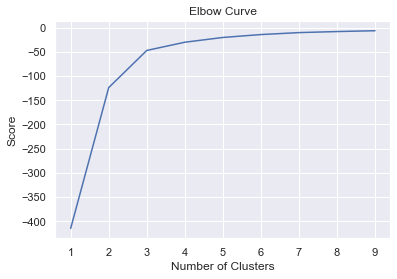

In [218]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['lat']]
X_axis = data[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

I am choosing 5 clusters

In [219]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X_lat_log[X_lat_log.columns[1:3]]) # Compute k-means clustering.
X_lat_log['cluster_label'] = kmeans.fit_predict(X_lat_log[X_lat_log.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_lat_log[X_lat_log.columns[1:3]]) # Labels of each point
X_lat_log.head(10)

,zipcode,lat,long,cluster_label
0,98178,47.5112,-122.257,2
1,98125,47.7210,-122.319,1
2,98028,47.7379,-122.233,1
3,98136,47.5208,-122.393,2
4,98074,47.6168,-122.045,4
5,98053,47.6561,-122.005,3
6,98003,47.3097,-122.327,2
7,98198,47.4095,-122.315,2
8,98146,47.5123,-122.337,2
9,98038,47.3684,-122.031,0


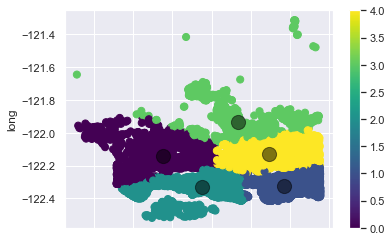

In [220]:
X_lat_log.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [221]:
# Merge Results

In [222]:
# Let’s remove the longitude and latitudes from X since they already exist on df

In [223]:
X_lat_log = X_lat_log[['zipcode','cluster_label']]
X_lat_log.head(5)

,zipcode,cluster_label
0,98178,2
1,98125,1
2,98028,1
3,98136,2
4,98074,4


In [224]:
# Let’s merge the data now

In [225]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [226]:
data = pd.concat([data, X_lat_log], axis=1, join="inner")

In [227]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,zipcode,cluster_label
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,221900,98178,2
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,538000,98125,1
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,180000,98028,1
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,604000,98136,2
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,510000,98074,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,360000,98103,1
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,400000,98146,2
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,402101,98144,1
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,400000,98027,4


Since I have the information about zipcode, lat and long in the cluster_label, I can drop these columns.

In [228]:
data = data.drop("zipcode", axis=1)

In [229]:
data = data.drop("lat", axis=1)

In [230]:
data = data.drop("long", axis=1)


In [231]:
data = data.drop("id", axis=1)

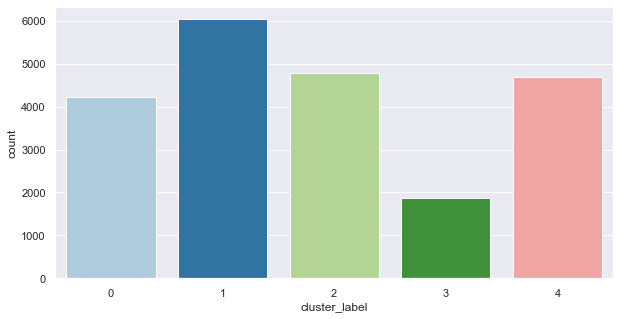

In [232]:
plt.figure(figsize=(10,5))
sns.countplot(x='cluster_label', data=data, palette = "Paired")
plt.show()

<AxesSubplot:xlabel='cluster_label', ylabel='price'>

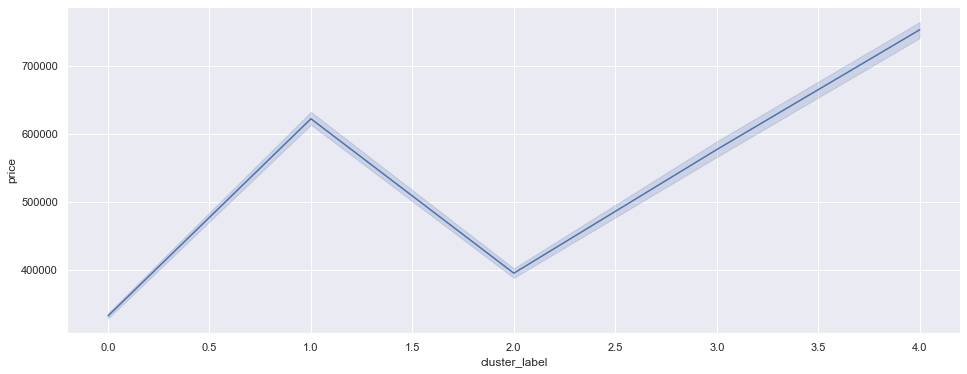

In [233]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="cluster_label", y="price")

The cluster with higher price is the 5

<AxesSubplot:xlabel='grade', ylabel='price'>

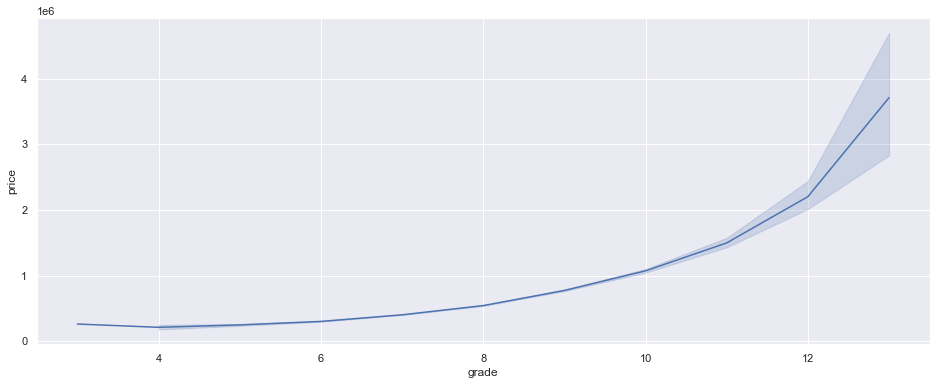

In [234]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="grade", y="price")

We observe that, as we would expect, the higher the grade of the house, the higher the price

<AxesSubplot:xlabel='floors', ylabel='price'>

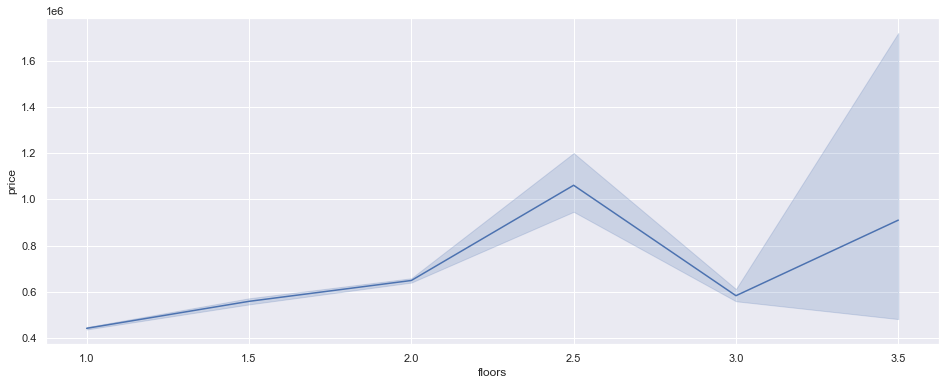

In [287]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="floors", y="price")

<AxesSubplot:xlabel='waterfront', ylabel='price'>

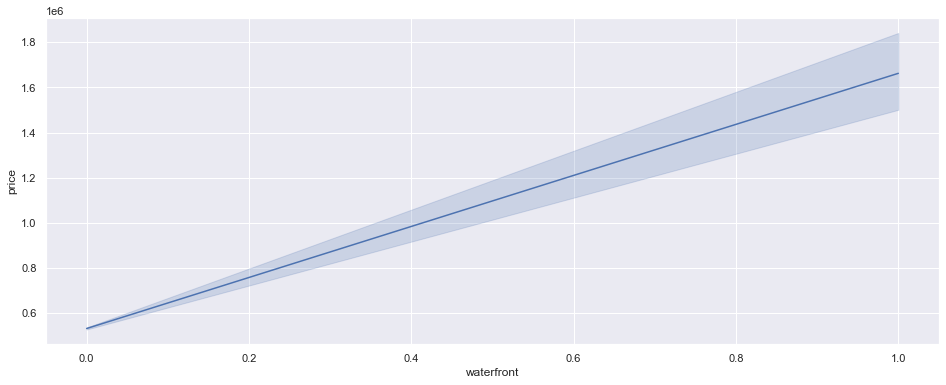

In [289]:
plt.figure(figsize=(16,6))

sns.lineplot(data=data , x="waterfront", y="price")

The prices of the houses which has a view to a waterfront are higher

Now that we have explored a little bit the numerical variables, let's see if there are correlation between them to see if we could have a problem of multicollinearity

In [235]:
corr_data = data.select_dtypes([np.number])
correlations_matrix = corr_data.corr()  
correlations_matrix

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,cluster_label
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,0.393406,0.030690,0.308787,0.108200
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,0.569884,0.088303,0.525906,0.168538
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,0.756402,0.184342,0.701917,0.239893
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,0.144763,0.718204,0.089876,0.042895
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,0.280102,-0.010722,0.256804,0.016978
waterfront,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.086507,0.030781,0.266398,0.032638
view,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.280681,0.072904,0.397370,0.039553
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,-0.093072,-0.003126,0.036056,-0.045468
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,0.713867,0.120981,0.667951,0.267890
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,0.731767,0.195077,0.605368,0.227674


<AxesSubplot:>

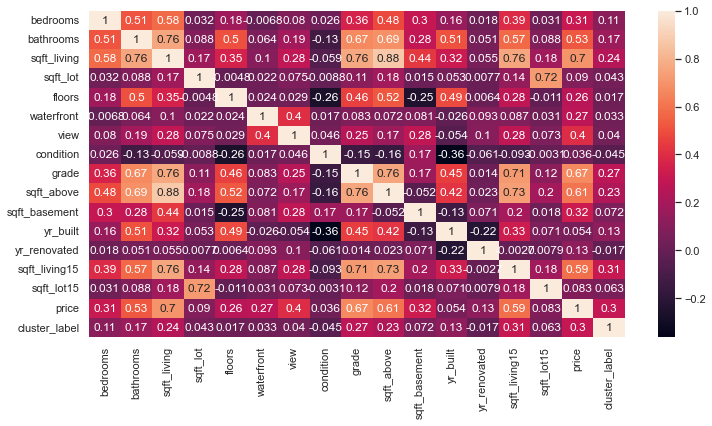

In [236]:
 plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True)

In [237]:
correlations_matrix[(correlations_matrix['price'] > .6) | (correlations_matrix['price'] < -.6)]['price']

sqft_living    0.701917
grade          0.667951
sqft_above     0.605368
price          1.000000
Name: price, dtype: float64

Sqft_living, Grade and Sqft_above are the variable with higher correlation with the target variable. 

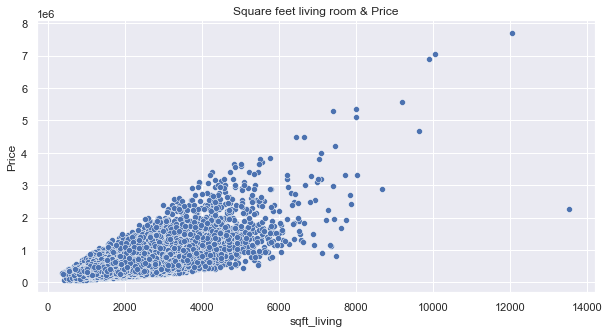

In [238]:
plt.figure(figsize=(10,5))
plt.title('Square feet living room & Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
sns.scatterplot(data['sqft_living'],data['price'])
plt.show()

We can see a positive relationship between sqft_living and prices; the higher Square feet of the living room the higher the price 

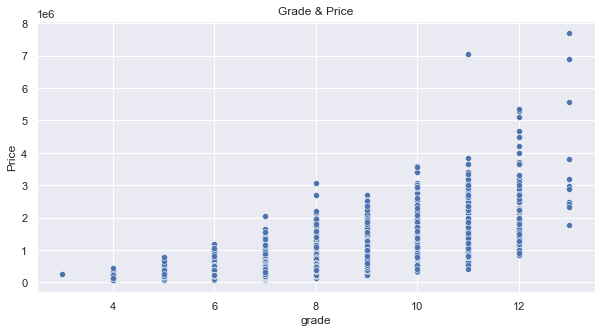

In [239]:
plt.figure(figsize=(10,5))
plt.title('Grade & Price')
plt.xlabel('grade')
plt.ylabel('Price')
sns.scatterplot(data['grade'],data['price'])
plt.show()

The higher the grade higher price

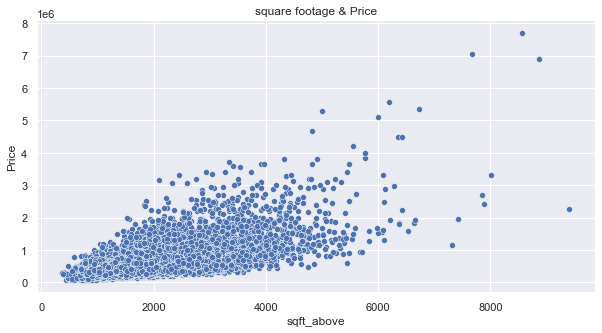

In [240]:
plt.figure(figsize=(10,5))
plt.title('square footage & Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
sns.scatterplot(data['sqft_above'],data['price'])
plt.show()

The higher square footage of house apart from the basement, the higher the price

In [243]:
data1 = data.copy()

### Feature Selection - Correlations and Multi-Colinearity

We have to check if we have Multi-Colinearity, which means a high correlation between features.

Since we have a lot of features it is a little difficult to check the correlation between features just by looking into the correlation matrix, so I am going to use the VIF (Variance Inflation Factor) method, which will help me with the feature selection. 

In [244]:
numericals = data1.select_dtypes(np.number).drop(columns=['price'], axis=1)

In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:

vif_numericals = add_constant(numericals) # i need to crear a constant
vif_numericals

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,cluster_label
0,1.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2
1,1.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,1.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1
3,1.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2
4,1.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,1
21593,1.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,2
21594,1.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,1
21595,1.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,4


In [246]:


threshold = 

while True: 
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
   
    if max(values) > threshold:

        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]

        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

,0
cluster_label,1.133744
yr_renovated,1.143822
waterfront,1.204513
condition,1.221921
view,1.410253
bedrooms,1.645518
floors,1.960313
yr_built,2.016857
sqft_lot,2.086219
sqft_lot15,2.116137


,0
cluster_label,1.133744
yr_renovated,1.143822
waterfront,1.204513
condition,1.221921
view,1.410253
bedrooms,1.645518
floors,1.960313
sqft_basement,1.983877
yr_built,2.016857
sqft_lot,2.086219


,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,cluster_label
0,1.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2
1,1.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1
2,1.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1
3,1.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,2
4,1.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,1
21593,1.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,2
21594,1.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,1
21595,1.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,4


I see that the VIF would remove the feature sqft_living, however, I don't really like the idea of removing this feature because I saw it was one of the features with the highest correlation with the target variable. First I want to see if my model can work without removing it, if I observe there could be a problem of multicollinearity indeed, I will remove some feature.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

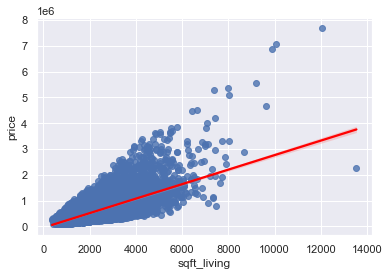

In [247]:
sns.regplot(X['sqft_living'], y, line_kws={"color": "red"})

In [248]:
data = data.drop(columns=['date'])

# Training the model

In [249]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Linear Regression

### MODEL 1

In [250]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [251]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [252]:
lr.score(X_test, y_test)

0.6544632606215395

#### Analyzing Results

In [253]:
# get predictions
predictions = lr.predict(X_test)

In [254]:

rmse = mean_squared_error(y_test, predictions, squared=False) 
mae = mean_absolute_error(y_test, predictions)


print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.65
RMSE: 212119.09118317894
MAE: 135621.07586025773


In [255]:
pd.DataFrame([abs(i) for i in lr.coef_], index=lr.feature_names_in_, columns=['coef']).sort_values('coef', ascending=False).tail(50)

,coef
waterfront,554199.557094
grade,115157.825209
bathrooms,49073.923009
view,46709.363310
bedrooms,42331.309032
floors,41798.629170
cluster_label,31639.903689
condition,22321.928501
yr_built,3720.293333
sqft_living,109.754739


Even though I have quite okey R2 score (0.65), the mean absolute error and the mean squared error are way too high. I am going to try to improve my model with Feature Engineering

### Feature Engineering

## MODEL 2 

In [256]:
X = data.drop('price', axis=1)
y = data['price']

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [258]:
reg = LinearRegression()


In [259]:
# Fit the model to the training data
reg.fit(X_train, y_train)


LinearRegression()

In [260]:
# Make predictions on the test set
y_pred = reg.predict(X_test)

In [261]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Compute the R^2 score of the predictions
r2 = r2_score(y_test, y_pred)

In [262]:

rmse = mean_squared_error(y_test, y_pred, squared=False) 
mae = mean_absolute_error(y_test, y_pred)


print("R2_score:", round(r2_score(y_test, y_pred),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.65
RMSE: 222128.9282329061
MAE: 134671.1857285314


In [263]:
pd.DataFrame([abs(i) for i in reg.coef_], index=lr.feature_names_in_, columns=['coef']).sort_values('coef', ascending=False).tail(50)

,coef
grade,134076.067324
yr_built,107261.956823
sqft_living,76881.429636
sqft_above,63063.709893
waterfront,48934.621036
cluster_label,46082.464282
sqft_basement,41676.595879
bedrooms,38755.088621
bathrooms,34891.532149
view,32517.809255


Scaling hasn't really help me improve the model, so I will try other ways 

### MODEL 3

I want to try do a log transformation to our target variable price, because as we saw It had a lot of outliers

In [264]:
data1 = data.copy()

In [265]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN


In [266]:
data1['price'] = data1['price'].apply(log_transform).fillna(data1['price'].mean())

<AxesSubplot:xlabel='price', ylabel='Density'>

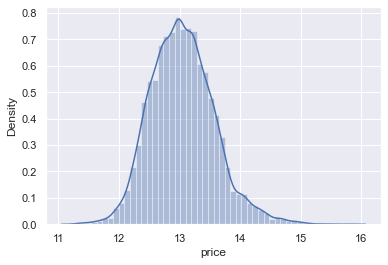

In [267]:
sns.distplot(data1['price'])

I see that by applying the log transformation in the price variable, it becomes more normally distributed, as the log softens the outliers

I will try to recalculate the model 1 with the target variable transformed 

In [268]:
X = data1.drop('price', axis=1)
y = data1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [269]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [270]:
lr.score(X_test, y_test)

0.677092749365692

In [271]:
predictions = lr.predict(X_test)

In [272]:

rmse = mean_squared_error(y_test, predictions, squared=False) 
mae = mean_absolute_error(y_test, predictions)


print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.68
RMSE: 0.29655435185812457
MAE: 0.2299630198679109


These results are much better. Even though the R2 hasn't improved that much, the errors are way lower.

## MODEL 4 

Now I want to combine the log transformation on the target variable with model 2

In [273]:
X = data1.drop('price', axis=1)
y = data1['price']

In [274]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [275]:
reg = LinearRegression()

In [276]:
reg.fit(X_train, y_train)

LinearRegression()

In [277]:
y_pred = reg.predict(X_test)

In [278]:
from sklearn.metrics import mean_squared_error, r2_score


In [279]:

rmse = mean_squared_error(y_test, y_pred, squared=False) 
mae = mean_absolute_error(y_test, y_pred)


print("R2_score:", round(r2_score(y_test, y_pred),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.69
RMSE: 0.29332998204796945
MAE: 0.22823703274663176


In [280]:
pd.DataFrame([abs(i) for i in reg.coef_], index=lr.feature_names_in_, columns=['coef']).sort_values('coef', ascending=False).tail(50)

,coef
grade,0.226782
yr_built,0.164424
cluster_label,0.106807
floors,0.082389
bathrooms,0.058490
sqft_basement,0.057702
sqft_living,0.054492
sqft_living15,0.052365
view,0.036224
condition,0.030644


Model 2 and 3 are log linear model, because our target variable y is in log units and the rest of the features are linear. 

Because this is a log-lin model, the interpretation of the coefficients is diffrent from a regular linerar model. For example, for every 1 unit increase in the grade, our dependent variable (price) will increase by 22%

In [284]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = y_pred
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
3078,12.821258,12.663749,0.157509
14425,13.112313,13.112742,0.000429
18515,13.104505,12.873939,0.230566
6883,12.345835,12.476785,0.130950
21408,13.698977,13.857618,0.158641
...,...,...,...
4623,14.159100,13.745139,0.413961
7922,13.570249,13.368222,0.202027
7766,12.506177,12.667934,0.161757
6524,13.676248,13.382020,0.294229


<AxesSubplot:xlabel='true', ylabel='pred'>

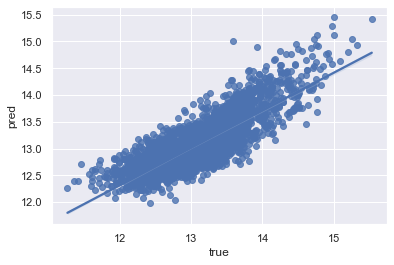

In [285]:
sns.regplot(results['true'], results['pred'])

# CONCLUSIONS

Our goal was to create a Regression Model that would help us predict the selling prices of houses based on a variety of features. 

During the creation of the model we have seen that there are some values that have a big influence on the price of the houses. For example the size of the house, the grade and the area on which the houses are built. 

We have generated 4 different models in order to improve the metrics and observe how the data reacts to different modifications

We have oberved that our target variable had a lot of outliers so we decided that it was a good idea to apply a log transformation to it. 

This allowed to reach a model with high R2 and low errors, that can tell us how the price reacts with the different features in our data. Model 3 and 4 are the ones we should use to predict the values